In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dfx=pd.read_csv('Training Data/Logistic_X_Train.csv')
dfy=pd.read_csv('Training Data/Logistic_Y_Train.csv')
x=dfx.values
y=dfy.values
print(x.shape,y.shape)

(3000, 3) (3000, 1)


In [6]:
def hypothesis(x,w,b):
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
    grad_w/=m
    grad_b/=m
    return [grad_w,grad_b]    

In [27]:
def grad_Descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b

def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_prediction(x_tst,w,b):
    y_pred=[]
    for i in range(x_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
    return y_pred   

In [28]:
loss=[]
acc=[]
w=2*np.random.random((x.shape[1],))
b=5*np.random.random()

for i in range(300):
    l,w,b=grad_Descent(x,y,w,b,learning_rate=0.1)
    #acc.append(get_acc(X_test,Y_test,w,b))
    loss.append(l)

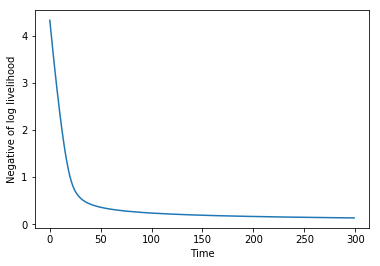

In [29]:
plt.plot(loss)
plt.xlabel("Time")
plt.ylabel("Negative of log livelihood")
plt.show()

In [30]:
dfx=pd.read_csv('Test Cases/Logistic_X_Test.csv')
x_tst=dfx.values
print(x_tst.shape)

(1000, 3)


In [31]:
y_pred=get_prediction(x_tst,w,b)

In [34]:
ans=pd.DataFrame(y_pred,columns=['label'])
ans.to_csv('submit.csv',index=False) 